# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [128]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [129]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [130]:
#  1. Get the total rides for each city type

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [131]:
# 2. Get the total drivers for each city type

total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [132]:
#  3. Get the total amount of fares for each city type

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [133]:
#  4. Get the average fare per ride for each city type. 

average_fare_per_ride = total_fares / total_rides


average_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [134]:
# 5. Get the average fare per driver for each city type. 

average_fare_per_driver = total_fares / total_drivers

average_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [135]:
#  6. Create a PyBer summary DataFrame. 

# Assemble into DataFrame.
pyber_summary_df = pd.DataFrame({
          "Total Rides" : total_rides,
          "Total Drivers": total_drivers,
          "Total Fares": total_fares,
          "Average Fare Per Ride": average_fare_per_ride,
          "Average Fare Per Driver": average_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [136]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [137]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:.0f}".format)

pyber_summary_df["Total Drivers"] = type_summary_df["Total Drivers"].map("{:.0f}".format)

pyber_summary_df["Total Fares"] = type_summary_df["Total Fares"].map('${:,.2f}'.format)

pyber_summary_df["Average Fare Per Ride"] = type_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

pyber_summary_df["Average Fare Per Driver"] = type_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [208]:
# 1. Read the merged DataFrame

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [209]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_sumfares_df = pyber_data_df.groupby(["date", "type"]).sum()["fare"]

pyber_sumfares_df 

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [210]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

pyber_sumfares_df = pyber_sumfares_df.reset_index()

pyber_sumfares_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [211]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_sumfares_df = pyber_sumfares_df.pivot(index = 'date', columns = 'type', values = 'fare')

pyber_sumfares_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [212]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_sumfares_loc_df = pyber_sumfares_df.loc['2019-01-01':'2019-04-29']
pyber_sumfares_loc_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [213]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_sumfares_loc_df.index = pd.to_datetime(pyber_sumfares_loc_df.index)
pyber_sumfares_loc_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='date', length=2196, freq=None)

In [214]:
# 7. Check that the datatype for the index is datetime using df.info()

pyber_sumfares_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [296]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

pyber_sumfares_resampled_df = pyber_sumfares_loc_df.resample('W').sum()

pyber_sumfares_resampled_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


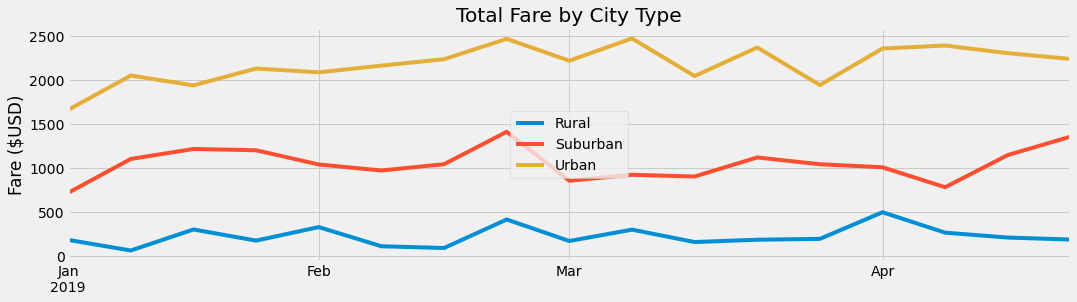

In [334]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.

from matplotlib import style

# Use the graph style fivethirtyeight.

style.use('fivethirtyeight')

ax = pyber_sumfares_resampled_df.plot(figsize=(16,4))

ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel(None)
ax.legend(loc = 'center')

plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()
